<!DOCTYPE html>
<html lang="en">
<head>
    <style>
        @import url('https://fonts.googleapis.com/css2?family=Lexend:wght@400;700&display=swap');
        @font-face {
            font-family: 'Menlo Nerd';
            src: url('path/to/menlo-nerd-font.woff2') format('woff2');
        }
        body {
            font-family: 'Lexend', sans-serif;
        }
        code, pre {
            font-family: 'Menlo Nerd', monospace;
        }
    </style>
</head>
<body>
</body>
</html>

<!-- # Vadar Alpha
# Supply Chain Modeling, Pricing, and Risk Analysis using Emerging Technologies 

Welcome to our first blog post! We are excited to introduce our supply chain modeling, pricing, and risk software that leverages AI and ML models for description, prediction, and decision-making. In this notebook, we will walk you through the process of using our software to analyze a sample dataset.

## Sections
1. [Setup](#Setup)
2. [Data Description](#Data-Description)
3. [Data Preprocessing](#Data-Preprocessing)
4. [Modeling](#Modeling)
5. [Prediction](#Prediction)
6. [Decision Making](#Decision-Making)
7. [Visualization](#Visualization)
8. [Conclusion](#Conclusion) -->


## Clarity with Data: Supply Chains

## Interactive Network Visualization: Unveiling Complex Relationships

In this blog post, we delve into the world of interactive network visualization, demonstrating how to effectively map and explore complex relationships within data. Using cutting-edge tools and techniques, we guide you through the process of creating dynamic visualizations that not only reveal hidden patterns but also enhance data comprehension and decision-making. Whether you're a data scientist, researcher, or enthusiast, this tutorial equips you with the skills to transform raw data into insightful, interactive network graphs.

## Use Case

In today's data-driven world, understanding complex relationships within datasets is crucial for making informed decisions. Interactive network visualization serves as a powerful tool to uncover these intricate connections, providing clarity and insights that static charts and graphs often miss. 

### Why It Matters

- **Enhanced Data Comprehension**: By visualizing relationships interactively, users can explore data from multiple angles, leading to a deeper understanding of the underlying patterns and structures.
- **Improved Decision-Making**: Interactive visualizations allow stakeholders to identify key influencers, detect anomalies, and predict trends, thereby facilitating more accurate and strategic decisions.
- **Versatility Across Domains**: Whether in social network analysis, biological research, cybersecurity, supply chain logistics, or business intelligence, interactive network visualizations can be applied to a wide range of fields to solve complex problems.

### Practical Example

Imagine a scenario where a company wants to analyze its customer interactions on social media. By creating an interactive network visualization, the company can:
- Identify influential customers who drive conversations.
- Detect clusters of customers with similar interests or behaviors.
- Monitor the spread of information and sentiment across the network.

This use case demonstrates how interactive network visualization can transform raw data into actionable insights, empowering organizations to harness the full potential of their data.

## Install

We begin by downloading and installing our needed libraries. 

Note: If running this notebook for the first time, please uncomment the following line to install the required packages.

In [1]:

#!pip install pandas numpy scikit-learn matplotlib seaborn folium


## Import
Import the required packages.

In [2]:
import warnings
warnings.filterwarnings('ignore') # Ignore all warnings
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.distance import geodesic
import osmnx as ox
from sklearn.preprocessing import MinMaxScaler



## Data Description

In this demonstration, we will explore the intricacies of supply chain operations through interactive network visualization. Supply chains are complex systems with numerous interconnected entities, and understanding these relationships is crucial for effective risk management.

### Why Synthetic Data?

For illustration purposes, we will create and use synthetic data. Synthetic data allows us to:
- **Maintain Privacy**: Avoid exposing sensitive or proprietary information.
- **Control Variables**: Tailor the dataset to highlight specific scenarios and relationships.
- **Facilitate Reproducibility**: Ensure that others can replicate the analysis without needing access to confidential data.

By using synthetic data, we can simulate various aspects of supply chain operations, such as supplier relationships, transportation routes, and inventory levels, while maintaining a high level of control over the dataset.

### Relevance to Supply Chain Risk Management

Supply chain risk management involves identifying, assessing, and mitigating risks that can disrupt the flow of goods and services. Interactive network visualization aids in this process by:
- **Mapping Relationships**: Visualizing the connections between suppliers, manufacturers, distributors, and retailers to identify potential points of failure.
- **Detecting Vulnerabilities**: Highlighting critical nodes and links within the supply chain that, if disrupted, could have significant impacts.
- **Enhancing Decision-Making**: Providing a clear and interactive view of the supply chain, enabling stakeholders to make informed decisions about risk mitigation strategies.

### Visualization Benefits

The interactive nature of the visualization allows users to:
- **Explore Data Dynamically**: Interact with the network to uncover hidden patterns and relationships.
- **Identify Key Influencers**: Detect which entities play pivotal roles in the supply chain.
- **Simulate Scenarios**: Model different risk scenarios and observe their potential impacts on the supply chain.

By setting the stage with synthetic data and leveraging interactive network visualization, we can effectively model and analyze supply chain risk management activities, providing valuable insights and actionable strategies.

Let's create the synthetic data and begin our analysis.

In [3]:
# Number of data points
num_points = 500

# Define the center of the map (Chicago coordinates)
chicago_coords = (41.8781, -87.6298)

dist=100000

# Path to save/load the cached graph
graph_path = 'chicago_graph.graphml'

# Check if the graph is already cached
if not os.path.exists(graph_path):
    # Get the road network for Chicago
    G = ox.graph_from_point(chicago_coords, dist=dist, network_type='drive')
    # Save the graph to a file
    ox.save_graphml(G, graph_path)
else:
    # Load the graph from the file
    G = ox.load_graphml(graph_path)

# Generate random points on the road network
nodes = list(G.nodes)
random_nodes = np.random.choice(nodes, num_points, replace=False)
lat_lon_points = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in random_nodes]

# Generate synthetic data
np.random.seed(42)
locations = [f'Location_{i}' for i in range(num_points)]
supply = np.random.randint(50, 200, size=num_points)
# Extract latitude and longitude from lat_lon_points
latitude = np.array([point[0] for point in lat_lon_points])
longitude = np.array([point[1] for point in lat_lon_points])
# Create a target variable with a clear relationship to the features
risk = 0.8 * latitude + 0.4 * longitude + .5 * supply +np.random.normal(0, 1, num_points)


# Define types and assign them randomly
types = ['Supplier', 'Manufacturer', 'Distributor']
node_types = np.random.choice(types, num_points)

# Ensure balanced type assignment
while len(set(node_types)) < len(types):
    node_types = np.random.choice(types, num_points)

# Create a DataFrame
data = pd.DataFrame({
    'location': locations,
    'type': node_types,
    'supply': supply,
    'risk': risk,
    'latitude': latitude,
    'longitude': longitude
})

# Adjust demand and supply based on type
data['demand'] = np.where(data['type'] == 'Distributor', np.random.randint(50, 200, size=num_points), 0)
data['supply'] = np.where(data['type'] == 'Manufacturer', np.random.randint(50, 200, size=num_points), data['supply'])

# Save to CSV
data.to_csv('sample_supply_chain_data.csv', index=False)

# Display the first few rows
data.head()


,location,type,supply,risk,latitude,longitude,demand
0,Location_0,Supplier,152,75.170586,41.976258,-88.677782,0
1,Location_1,Manufacturer,85,69.591577,41.774040,-87.662851,0
2,Location_2,Manufacturer,175,29.951917,41.729611,-87.786008,0
3,Location_3,Supplier,156,76.782930,41.946381,-88.081540,0
4,Location_4,Distributor,121,59.256189,42.108521,-87.792101,182


Let's load and explore the dataset.

In [4]:
# Load dataset
data = pd.read_csv('sample_supply_chain_data.csv')
data.head()


,location,type,supply,risk,latitude,longitude,demand
0,Location_0,Supplier,152,75.170586,41.976258,-88.677782,0
1,Location_1,Manufacturer,85,69.591577,41.774040,-87.662851,0
2,Location_2,Manufacturer,175,29.951917,41.729611,-87.786008,0
3,Location_3,Supplier,156,76.782930,41.946381,-88.081540,0
4,Location_4,Distributor,121,59.256189,42.108521,-87.792101,182


# Data Preprocessing

Data preprocessing is a critical step in the data analysis and modeling pipeline. Proper preprocessing ensures that the data is clean, consistent, and suitable for building accurate and reliable models. In this section, we will:

1. **Handle Missing Values**: Missing data can lead to biased estimates and reduce the overall quality of the analysis. By identifying and addressing missing values, we ensure that our models are trained on complete and accurate data, leading to more reliable predictions.

2. **Encode Categorical Variables**: Many machine learning algorithms require numerical input. Encoding categorical variables transforms them into a numerical format, allowing the algorithms to process and learn from the data effectively. This step is essential for incorporating categorical information into our models.

3. **Split the Data**: To evaluate the performance of our models, we need to divide the dataset into training and testing sets. The training set is used to train the model, while the testing set is used to assess its performance on unseen data. This practice helps prevent overfitting and ensures that the model generalizes well to new data.

By following these best practices in data preprocessing, we enhance the quality of our analysis and increase the likelihood of building robust and accurate models. Properly preprocessed data leads to better insights, more reliable predictions, and ultimately, more informed decision-making.

In [5]:

# Handle missing values
data = data.dropna()

# Encode categorical variables
categorical_columns = ['type', 'location']
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

target_column = 'risk'

# Split data into features and target variable
X = data.drop([target_column], axis=1)
y = data[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Modeling

In this section, we will build and train a simple linear regression model to predict the risk associated with different entities in our supply chain. 

### Scenario

Imagine a scenario where a company wants to assess the risk levels of its suppliers to ensure a resilient supply chain. The risk column in our dataset represents a composite risk score for each supplier, calculated based on various factors such as financial stability, geopolitical conditions, historical performance, and supply chain disruptions.

### Importance of Risk Analysis

The ability to assess and predict risk in the supply chain unlocks a multitude of benefits, including:
- **Proactive Risk Mitigation**: By identifying high-risk suppliers, the company can take proactive measures to mitigate potential disruptions.
- **Resource Allocation**: Understanding risk levels helps in prioritizing resources and efforts towards securing the most vulnerable parts of the supply chain.
- **Strategic Decision-Making**: Accurate risk predictions enable better strategic planning and decision-making, ensuring a more resilient and efficient supply chain.

### Commonality in Supply Chain Modeling

Risk analysis and prediction are common exercises in supply chain modeling and management. Companies frequently use statistical and machine learning models to:
- **Predict Supplier Performance**: Forecast the reliability and performance of suppliers based on historical data.
- **Optimize Inventory Levels**: Determine optimal inventory levels to balance cost and risk.
- **Enhance Supplier Selection**: Make informed decisions when selecting new suppliers or evaluating existing ones.

By building a linear regression model to predict the risk scores, we can gain valuable insights into the factors influencing supply chain risk and develop strategies to manage and mitigate these risks effectively.

Now, let's proceed with building and training our linear regression model.


In [6]:

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Prediction

With our model trained, the next step is to use it to make predictions on the test set and evaluate its performance. This step is crucial for understanding how well our model generalizes to new, unseen data.

### Making Predictions

We will use the trained model to predict the risk scores for the entities in the test set. This involves feeding the test data into the model and obtaining the predicted risk values.

### Evaluating Performance

To assess the performance of our model, we will compare the predicted risk scores with the actual risk scores in the test set. Key metrics for evaluation include:

- **Mean Absolute Error (MAE)**: Measures the average magnitude of the errors in a set of predictions, without considering their direction. It provides a straightforward interpretation of the average prediction error.
- **Mean Squared Error (MSE)**: Measures the average of the squares of the errors. It gives a higher weight to larger errors, making it useful for identifying models that make large prediction errors.
- **R-squared (R²)**: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. It provides an overall measure of how well the model explains the observed outcomes.

### Importance of Model Evaluation

Evaluating the model's performance is essential for several reasons:
- **Model Validation**: Ensures that the model is not overfitting or underfitting the data and that it performs well on new, unseen data.
- **Insight into Model Accuracy**: Provides a quantitative measure of how accurate the model's predictions are, which is critical for making informed decisions based on the model's output.
- **Guidance for Improvement**: Identifies areas where the model may be improved, such as by tuning hyperparameters, adding more features, or using a different modeling approach.

By making predictions and evaluating the model's performance, we can determine the effectiveness of our risk prediction model and its potential application in real-world supply chain risk management scenarios.

Let's proceed with making predictions and evaluating the model.

In [7]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 238.44258571289276


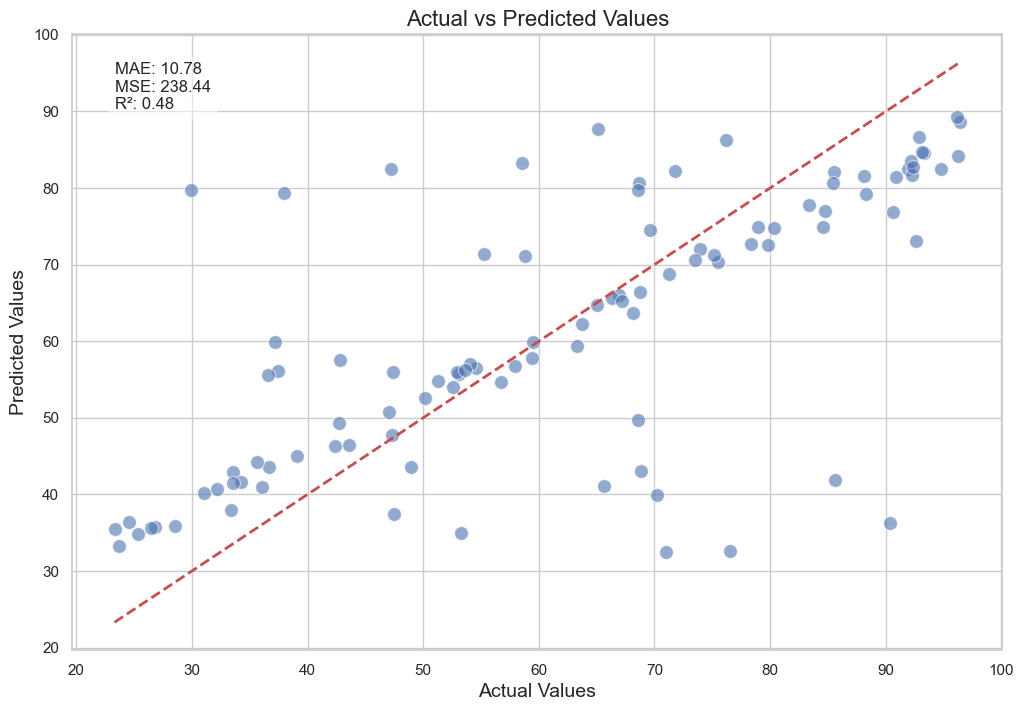

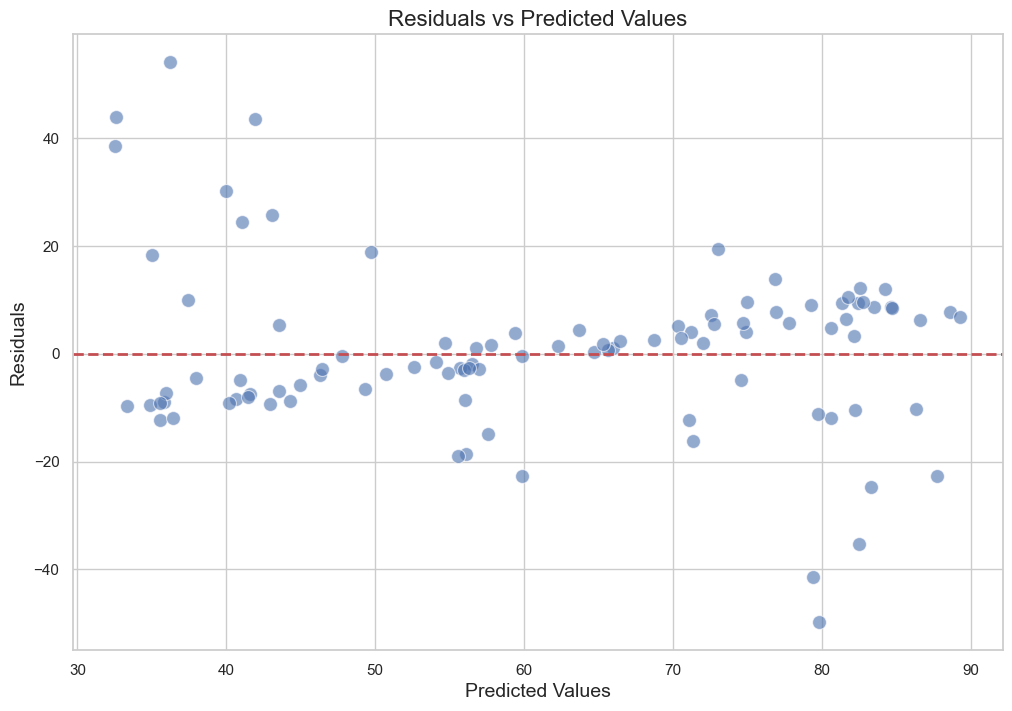

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Set the style
sns.set(style="whitegrid")

# Plot predictions vs actual values
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor='w', s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # Line of perfect prediction
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs Predicted Values', fontsize=16)
plt.text(min(y_test), max(y_test), f'MAE: {mae:.2f}\nMSE: {mse:.2f}\nR²: {r2:.2f}', 
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, edgecolor='w', s=100)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Predicted Values', fontsize=16)
plt.show()


In [9]:

# Handle missing values
data = data.dropna()

# Encode categorical variables
categorical_columns = ['type', 'location']
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

target_column = 'risk'

# Split data into features and target variable
X = data.drop([target_column], axis=1)
y = data[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Modeling

In this section, we will build and train a simple linear regression model to predict the risk associated with different entities in our supply chain. 

### Scenario

Imagine a scenario where a company wants to assess the risk levels of its suppliers to ensure a resilient supply chain. The risk column in our dataset represents a composite risk score for each supplier, calculated based on various factors such as financial stability, geopolitical conditions, historical performance, and supply chain disruptions.

### Importance of Risk Analysis

Assessing and predicting risk is crucial for supply chain management because:
- **Proactive Risk Mitigation**: By identifying high-risk suppliers, the company can take proactive measures to mitigate potential disruptions.
- **Resource Allocation**: Understanding risk levels helps in prioritizing resources and efforts towards securing the most vulnerable parts of the supply chain.
- **Strategic Decision-Making**: Accurate risk predictions enable better strategic planning and decision-making, ensuring a more resilient and efficient supply chain.

### Commonality in Supply Chain Modeling

Risk analysis and prediction are common exercises in supply chain modeling and management. Companies frequently use statistical and machine learning models to:
- **Predict Supplier Performance**: Forecast the reliability and performance of suppliers based on historical data.
- **Optimize Inventory Levels**: Determine optimal inventory levels to balance cost and risk.
- **Enhance Supplier Selection**: Make informed decisions when selecting new suppliers or evaluating existing ones.

By building a linear regression model to predict the risk scores, we can gain valuable insights into the factors influencing supply chain risk and develop strategies to manage and mitigate these risks effectively.

Now, let's proceed with building and training our linear regression model.


In [10]:

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Explanation

### Actual vs Predicted Values

The first plot compares the actual risk scores with the predicted risk scores. Each point represents an entity in the test set. The red dashed line represents the line of perfect prediction, where the predicted values would exactly match the actual values.

**Interpretation**: Points that lie close to the red dashed line indicate accurate predictions, while points further away indicate larger prediction errors. The scatterplot helps us visually assess the model's performance and identify any systematic biases.

**Evaluation Metrics**:
- **Mean Absolute Error (MAE)**: This metric tells us the average magnitude of the errors in the predictions, without considering their direction. A lower MAE indicates better model performance.
- **Mean Squared Error (MSE)**: This metric squares the errors before averaging them, giving more weight to larger errors. A lower MSE indicates better model performance.
- **R-squared (R²)**: This metric indicates the proportion of the variance in the actual values that is predictable from the predicted values. An R² value closer to 1 indicates a better fit.

### Residuals vs Predicted Values

The second plot shows the residuals (errors) versus the predicted values. The residuals are calculated as the difference between the actual and predicted values.

**Interpretation**: This plot helps us check for patterns in the residuals. Ideally, the residuals should be randomly distributed around the horizontal line at zero. Any patterns or systematic deviations from this line might indicate issues with the model, such as heteroscedasticity or non-linearity.

**Horizontal Line**: The red dashed horizontal line at zero represents the ideal scenario where the residuals are perfectly centered around zero.

By enhancing the aesthetics and providing a detailed narrative, we can better understand and communicate the performance of our risk prediction model.

# Decision Making

Based on the predictions from our risk model, we can make informed decisions to optimize our supply chain operations. The insights gained from the model allow us to identify areas with high risk and take proactive measures to mitigate them. Here are some specific actions we can take:

### Identifying High-Risk Suppliers

By analyzing the predicted risk scores, we can pinpoint suppliers that pose the highest risk to our supply chain. This enables us to:
- **Diversify Suppliers**: Reduce dependency on high-risk suppliers by identifying and onboarding alternative suppliers.
- **Negotiate Better Terms**: Engage with high-risk suppliers to negotiate better terms, such as more flexible delivery schedules or improved quality control measures.
- **Monitor Closely**: Implement more rigorous monitoring and auditing processes for high-risk suppliers to ensure compliance and performance.

### Optimizing Inventory Levels

Understanding the risk associated with different suppliers helps in optimizing inventory levels. We can:
- **Increase Safety Stock**: Maintain higher safety stock levels for products sourced from high-risk suppliers to buffer against potential disruptions.
- **Dynamic Inventory Management**: Adjust inventory levels dynamically based on the risk scores, ensuring that critical products are always available.

### Enhancing Transportation and Logistics

Risk predictions can also inform transportation and logistics decisions:
- **Route Optimization**: Optimize transportation routes to avoid regions with high geopolitical or environmental risks.
- **Contingency Planning**: Develop contingency plans for logistics operations, such as alternative routes or backup transportation providers, to mitigate the impact of disruptions.

### Strategic Sourcing and Procurement

Incorporating risk predictions into sourcing and procurement strategies can lead to more resilient supply chains:
- **Risk-Based Supplier Selection**: Use risk scores as a criterion for selecting new suppliers, favoring those with lower risk profiles.
- **Long-Term Contracts**: Establish long-term contracts with low-risk suppliers to ensure stability and reliability.

### Financial Planning and Budgeting

Accurate risk predictions enable better financial planning and budgeting:
- **Cost Allocation**: Allocate budget for risk mitigation activities, such as insurance, safety stock, and contingency planning.
- **Investment Decisions**: Make informed investment decisions in supply chain infrastructure and technology to enhance resilience.

### Continuous Improvement

Finally, the insights from the risk model can drive continuous improvement initiatives:
- **Feedback Loop**: Establish a feedback loop where the outcomes of risk mitigation actions are monitored and used to refine the risk model.
- **Training and Awareness**: Conduct training sessions for supply chain personnel to raise awareness about risk management practices and the importance of proactive measures.

By leveraging the predictions from our risk model, we can make data-driven decisions that enhance the resilience and efficiency of our supply chain operations. This proactive approach helps in minimizing disruptions, reducing costs, and ensuring a steady flow of goods and services.


In [11]:
# Example decision-making process
# Identify high-risk areas (e.g., where predicted values exceed a certain threshold)
# Define a threshold value
threshold = 70  # Example threshold value, adjust as needed

high_risk_areas = X_test[y_pred > threshold]




# Visualization

Visualizing the supply chain and our risk predictions is a crucial step in understanding and communicating the insights derived from our analysis. We will use Folium, a powerful Python library for creating interactive maps, to visualize the locations of supply chain nodes and color-code them based on the predicted risk levels.

### Objectives

The main objectives of this visualization are:
- **Geographical Context**: Provide a geographical context to the supply chain nodes, helping stakeholders understand the spatial distribution of suppliers, manufacturers, and distribution centers.
- **Risk Identification**: Highlight high-risk nodes in the supply chain, enabling quick identification of potential problem areas.
- **Interactive Exploration**: Allow users to interact with the map, zoom in on specific regions, and obtain detailed information about each node.

### Steps

1. **Prepare the Data**: Ensure that the supply chain nodes have associated geographical coordinates (latitude and longitude) and predicted risk scores.
2. **Create the Map**: Initialize a Folium map centered on the region of interest.
3. **Add Nodes to the Map**: Add markers for each supply chain node, color-coded based on their predicted risk levels.
4. **Enhance Interactivity**: Add pop-ups or tooltips to provide additional information about each node, such as the name, type, and risk score.


### Implementation

Below is the implementation of the visualization using Folium:

In [12]:
# Create a map centered around the mean latitude and longitude
map_center = [data['latitude'].mean(), data['longitude'].mean()]
supply_chain_map = folium.Map(location=map_center, zoom_start=8)
folium.TileLayer('CartoDB dark_matter').add_to(supply_chain_map)

# Add markers to the map
for _, row in data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=f"Location: {row['location']}<br>Demand: {row['demand']}<br>Supply: {row['supply']}<br>Risk: {row['risk']}",
        color='red' if row['risk'] > threshold else 'green',
        fill=True,
        fill_color='red' if row['risk'] > threshold else 'green'
    ).add_to(supply_chain_map)

supply_chain_map



# Conclusion

In this notebook, we embarked on a journey through the interesting world of supply chain modeling, pricing strategies, and risk assessment. By analyzing a synthetic dataset, we showcased the power and versatility of our software in transforming raw data into actionable insights. We delved into data description, preprocessing, modeling, prediction, decision-making, and visualization, each step bringing us closer to a comprehensive understanding of supply chain dynamics.

But this is just the beginning. The real magic happens when these tools are applied to real-world scenarios, unlocking new efficiencies and opportunities. Stay tuned for upcoming blog posts where we will explore advanced topics and dive into real-world applications, demonstrating how our software can drive tangible improvements in supply chain management.

Thank you for joining us on this journey. We look forward to continuing this exploration together!
